In [31]:
import pypsa
import yaml
import pypsa
import warnings
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from datetime import datetime
from cartopy import crs as ccrs
from pypsa.plot import add_legend_circles, add_legend_lines, add_legend_patches
import os
import xarray as xr
import cartopy
import matplotlib.ticker as ticker

In [32]:
model = pypsa.Network('C:/Users/hie/pe_tan/pypsa-earth/results/2040_s1/networks/elec_s_all_ec_lcopt_1h.nc')

regions_onshore = gpd.read_file("C:/Users/hie/pe_tan/pypsa-earth/resources/2040_s1/shapes/country_shapes.geojson")
country_coordinates = regions_onshore.total_bounds[[0, 2, 1, 3]]
warnings.simplefilter(action='default', category=FutureWarning)

INFO:pypsa.io:Imported network elec_s_all_ec_lcopt_1h.nc has buses, carriers, generators, lines, loads, storage_units


In [33]:
lines = model.lines
buses = model.buses
generators = model.generators
generators_t = model.generators_t
load=model.loads
buses=model.buses





In [ ]:
model.export_to_csv_folder('resources/2030_s1/output')

INFO:pypsa.io:Exported network output has buses, lines, generators, carriers, storage_units, loads


In [35]:
# import matplotlib.pyplot as plt

# # Handle missing values in carrier columns
# model.generators['carrier'] = model.generators['carrier'].fillna('Unknown').astype(str)
# model.storage_units['carrier'] = model.storage_units['carrier'].fillna('Unknown').astype(str)

# # Calculate dispatch for generators (grouped by carrier)
# generator_dispatch = model.generators_t.p.sum() / 1e6 * 8760  # Convert to TWh
# generator_dispatch_by_carrier = generator_dispatch.groupby(model.generators.carrier).sum()

# # Calculate dispatch for storage units (grouped by carrier)
# storage_dispatch = model.storage_units_t.p.sum() / 1e6 * 8760  # Convert to TWh
# storage_dispatch_by_carrier = storage_dispatch.groupby(model.storage_units.carrier).sum()

# # Combine generator and storage dispatch
# total_dispatch = generator_dispatch_by_carrier+storage_dispatch_by_carrier

# # Plot the pie chart
# plt.figure(figsize=(10, 8))
# total_dispatch.plot.pie(
#     autopct='%1.1f%%',
#     startangle=90,
#     counterclock=False,
#     ylabel="",
#     title="Dispatch by Carrier and Storage Units (TWh)"
# )
# plt.show()

In [36]:
model.statistics()

Optimal Capacity  Installed Capacity  \
Generator   Biomass                 3.988719e+01        1.050000e+01   
            Coal                    6.000000e+02        6.000000e+02   
            Combined-Cycle Gas      5.242745e+03        1.192700e+03   
            Geothermal              9.950000e+02        1.350000e+02   
            Oil                     8.227839e+02        1.046000e+02   
            Onshore Wind            1.300000e+03        9.110670e-01   
            Open-Cycle Gas          6.616041e+02        1.850000e+02   
            Run of River            6.017862e+02        6.017862e+02   
            Solar                   3.000000e+03        1.447219e+01   
            load                    6.700000e+10        6.700000e+10   
Line        AC                      6.260421e+04        3.477151e+04   
Load        -                       0.000000e+00        0.000000e+00   
StorageUnit Reservoir & Dam         4.340626e+03        4.340626e+03   

                                      Supply    Withdrawal      Dispatch  \
Generator   Biomass             3.481774e+05  0.000000e+00  3.481774e+05   
            Coal                5.255277e+06  0.000000e+00  5.255277e+06   
            Combined-Cycle Gas  3.936314e+07  0.000000e+00  3.936314e+07   
            Geothermal          8.711809e+06  0.000000e+00  8.711809e+06   
            Oil                 4.446606e+06  0.000000e+00  4.446606e+06   
            Onshore Wind        7.707630e+05  0.000000e+00  7.707630e+05   
            Open-Cycle Gas      1.575425e+06  0.000000e+00  1.575425e+06   
            Run of River        2.913145e+06  0.000000e+00  2.913145e+06   
            Solar               1.788991e+06  0.000000e+00  1.788991e+06   
            load                1.400894e+06  0.000000e+00  1.400894e+06   
Line        AC                  2.835510e+08  2.835510e+08  0.000000e+00   
Load        -                   0.000000e+00  8.488877e+07 -8.488877e+07   
StorageUnit Reservoir & Dam     1.831455e+07  0.000000e+00  1.831455e+07   

                                Transmission  Capacity Factor   Curtailment  \
Generator   Biomass             0.000000e+00         0.996467  0.000000e+00   
            Coal                0.000000e+00         0.999862  0.000000e+00   
            Combined-Cycle Gas  0.000000e+00         0.857091  0.000000e+00   
            Geothermal          0.000000e+00         0.999496  0.000000e+00   
            Oil                 0.000000e+00         0.616934  0.000000e+00   
            Onshore Wind        0.000000e+00         0.067682  6.728530e+05   
            Open-Cycle Gas      0.000000e+00         0.271829  0.000000e+00   
            Run of River        0.000000e+00         0.552606  7.204715e+04   
            Solar               0.000000e+00         0.068074  2.441622e+06   
            load                0.000000e+00         0.000002  0.000000e+00   
Line        AC                  8.486169e+06         0.517039  0.000000e+00   
Load        -                   0.000000e+00              NaN  0.000000e+00   
StorageUnit Reservoir & Dam     0.000000e+00         0.481659  0.000000e+00   

                                Capital Expenditure  Operational Expenditure  \
Generator   Biomass                    1.411183e+07             5.514488e+06   
            Coal                       2.648996e+08             1.693472e+08   
            Combined-Cycle Gas         6.615392e+08             1.842702e+09   
            Geothermal                 0.000000e+00             8.048395e+04   
            Oil                        4.025689e+07             7.004881e+08   
            Onshore Wind               1.684547e+08             1.896060e+04   
            Open-Cycle Gas             3.899315e+07             1.019216e+08   
            Run of River               2.465120e+08             3.048581e+04   
            Solar                      1.448679e+08             3.534760e+04   
            load                       0.000000e+00

In [37]:
model.generators

,carrier,bus,p_nom_min,p_nom,p_nom_extendable,efficiency,marginal_cost,capital_cost,build_year,lifetime,...,q_set,marginal_cost_quadratic,committable,start_up_cost,shut_down_cost,stand_by_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
C31,biomass,46,9.0,9.000000e+00,True,0.468,15.838125,353793.420755,2010,30.0,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
C32,biomass,42,1.5,1.500000e+00,True,0.468,15.838998,353793.420755,2011,30.0,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
C33,CCGT,2,102.0,1.020000e+02,True,0.580,46.812501,126181.845894,2007,20.0,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
C34,CCGT,2,189.0,1.890000e+02,True,0.580,46.812533,126181.845894,2006,20.0,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
C35,CCGT,2,129.0,1.290000e+02,True,0.580,46.813154,126181.845894,2011,25.0,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80 load,load,80,0.0,1.000000e+09,False,1.000,8000.009696,0.000000,0,inf,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
81 load,load,81,0.0,1.000000e+09,False,1.000,8000.009262,0.000000,0,inf,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
82 load,load,82,0.0,1.000000e+09,False,1.000,8000.010232,0.000000,0,inf,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0


In [38]:
grouped_generators=model.generators.groupby(by=model.generators.p_nom).sum()
grouped_generators

,carrier,bus,p_nom_min,p_nom_extendable,efficiency,marginal_cost,capital_cost,build_year,lifetime,p_nom_max,...,q_set,marginal_cost_quadratic,committable,start_up_cost,shut_down_cost,stand_by_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
p_nom,,,,,,,,,,,,,,,,,,,,,
0.000000e+00,onwindonwindonwindonwindonwindonwindonwindonwi...,2471012151618202122232529303132333435363738404...,0.000000,87,87.00,2.038861,9.241226e+06,0,inf,9.737407e+05,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,87.0,87.0
1.001129e-01,solar,69,0.100113,1,1.00,0.020935,4.828930e+04,0,inf,8.712668e+03,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1.056758e-01,solar,23,0.105676,1,1.00,0.020458,4.828930e+04,0,inf,8.842307e+03,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1.139728e-01,solar,18,0.113973,1,1.00,0.020147,4.828930e+04,0,inf,1.009739e+04,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1.195508e-01,solar,53,0.119551,1,1.00,0.019443,4.828930e+04,0,inf,1.049737e+04,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.890000e+02,CCGT,2,189.000000,1,0.58,46.812533,1.261818e+05,2006,20.0,inf,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2.482000e+02,CCGT,2,248.200000,1,0.58,46.813637,1.261818e+05,2018,-5.0,inf,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3.000000e+02,CCGT,40,300.000000,1,0.58,46.812450,1.261818e+05,2026,25.0,inf,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [39]:
grouped_generators=model.generators.groupby(by=model.generators.carrier).sum()
grouped_generators

,bus,p_nom_min,p_nom,p_nom_extendable,efficiency,marginal_cost,capital_cost,build_year,lifetime,p_nom_max,...,q_set,marginal_cost_quadratic,committable,start_up_cost,shut_down_cost,stand_by_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
carrier,,,,,,,,,,,,,,,,,,,,,
CCGT,222223740404140,1192.700000,1.192700e+03,10,5.800,468.129206,1.261818e+06,20126,203.0,inf,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,10.0,10.0
OCGT,2,185.000000,1.850000e+02,1,0.410,64.694654,5.893728e+04,2027,20.0,inf,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
biomass,4642,10.500000,1.050000e+01,2,0.936,31.677123,7.075868e+05,4021,60.0,inf,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
coal,42,600.000000,6.000000e+02,1,0.330,32.224216,4.414993e+05,2026,20.0,inf,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
geothermal,88328,135.000000,1.350000e+02,4,4.000,0.038889,0.000000e+00,8112,100.0,inf,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
load,2478101215161820212223252729303132333435363738...,0.000000,6.700000e+10,0,67.000,536000.665484,0.000000e+00,0,inf,inf,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,67.0,67.0
oil,64154818181428180727273,104.600000,1.046000e+02,12,4.200,1890.406847,5.871319e+05,24098,240.0,inf,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,12.0,12.0
onwind,2478101215161820212223252729303132333435363738...,0.911067,9.110670e-01,67,67.000,1.667445,8.681896e+06,0,inf,1.269056e+06,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,67.0,67.0
ror,223636724920313142564247818131,0.000000,6.017862e+02,0,13.500,0.152249,6.144508e+06,0,inf,inf,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,15.0,15.0


In [40]:
total_p_nom = model.generators['p_nom'].sum()
total_p_nom

67000002844.9695

In [41]:
print(model.loads_t.p_set.sum())

Load
0     5.470761e+06
3     1.593777e+06
5     2.073434e+05
8     1.850487e+06
9     3.667853e+05
          ...     
80    6.704345e+05
81    2.910895e+06
82    6.261128e+04
83    5.377005e+05
84    2.359376e+06
Length: 67, dtype: float64


<AxesSubplot:xlabel='snapshot', ylabel='MW'>

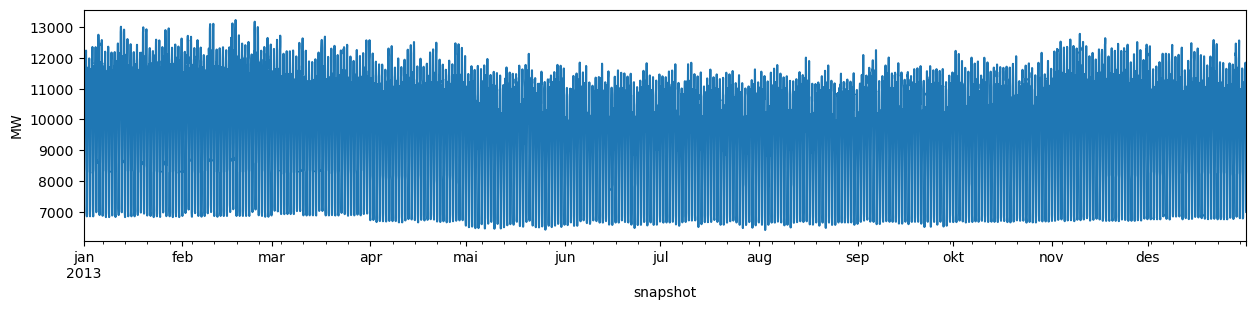

In [42]:
model.loads_t.p_set.sum(axis=1).plot(figsize=(15,3), ylabel="MW")

In [43]:
model.loads_t.p.sum()

Load
0     5.470761e+06
3     1.593777e+06
5     2.073434e+05
8     1.850487e+06
9     3.667853e+05
          ...     
80    6.704345e+05
81    2.910895e+06
82    6.261128e+04
83    5.377005e+05
84    2.359376e+06
Length: 67, dtype: float64

In [44]:
model.iplot(mapbox='osm')

{'data': [Scattermapbox({
      'lat': [-6.7116, -6.6413],
      'line': {'color': 'rosybrown', 'width': 3},
      'lon': [38.7439, 38.3689],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-5.3126, -4.0717],
      'line': {'color': 'rosybrown', 'width': 3},
      'lon': [38.6298, 37.7377],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-4.8396, -3.6219],
      'line': {'color': 'rosybrown', 'width': 3},
      'lon': [34.7573, 33.5148],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-8.8482, -8.9146],
      'line': {'color': 'rosybrown', 'width': 3},
      'lon': [34.8061, 33.4967],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-3.6219, -3.2208],
      'line': {'color': 'rosybrown', 'width': 3},
      'lon': [33.5148, 32.4905],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-3.861, -3.6219],
      'line': {'color'

c:\Users\hie\AppData\Local\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".



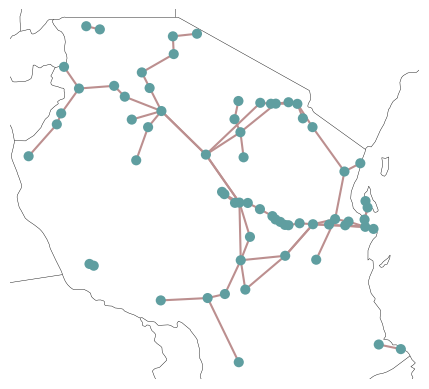

In [45]:
model.plot();


In [46]:
for c in model.iterate_components(list(model.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name,len(c.df)))

Component 'Bus' has 67 entries
Component 'Carrier' has 14 entries
Component 'Line' has 73 entries
Component 'LineType' has 34 entries
Component 'TransformerType' has 14 entries
Component 'Load' has 67 entries
Component 'Generator' has 246 entries
Component 'StorageUnit' has 16 entries


In [47]:
model.lines

,v_nom,bus0,bus1,length,dc,geometry,bounds,carrier,type,s_max_pu,...,s_nom_max,lifetime,terrain_factor,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu
Line,,,,,,,,,,,,,,,,,,,,,
0,380.0,21,29,43.985476,False,"MULTILINESTRING ((38.7439 -6.7116, 38.74378869...",MULTIPOINT ((38.357321400000096 -6.63929209999...,AC,Al/St 240/40 4-bundle 380.0,0.9,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
1,380.0,36,30,181.143759,False,MULTILINESTRING ((38.61499740000011 -5.2978653...,MULTIPOINT ((37.73768980000001 -4.071734399999...,AC,Al/St 240/40 4-bundle 380.0,0.9,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
2,380.0,27,12,221.213747,False,"LINESTRING (34.7563 -4.8406, 34.75503799999999...","MULTIPOINT ((34.7563 -4.8406), (33.5148 -3.6219))",AC,Al/St 240/40 4-bundle 380.0,0.9,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
3,380.0,42,8,161.020453,False,MULTILINESTRING ((33.49678590000009 -8.9145849...,"MULTIPOINT ((33.4967 -8.9146), (33.49678590000...",AC,Al/St 240/40 4-bundle 380.0,0.9,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
4,380.0,12,35,129.558873,False,MULTILINESTRING ((32.49089980000009 -3.2207166...,"MULTIPOINT ((32.4905 -3.2208), (32.49089980000...",AC,Al/St 240/40 4-bundle 380.0,0.9,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,380.0,73,84,16.178887,False,MULTILINESTRING ((31.504323200000012 -7.895004...,"MULTIPOINT ((31.5043 -7.895), (31.504323200000...",AC,Al/St 240/40 4-bundle 380.0,0.9,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
69,380.0,74,83,36.740825,False,"MULTILINESTRING ((30.5913 -3.9936, 30.59131800...","MULTIPOINT ((30.5913 -3.9936), (30.7134 -3.687...",AC,Al/St 240/40 4-bundle 380.0,0.9,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
70,380.0,75,57,15.448316,False,"MULTILINESTRING ((36.6172 -6.5587, 36.61727609...","MULTIPOINT ((36.6172 -6.5587), (36.61727609999...",AC,Al/St 240/40 4-bundle 380.0,0.9,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0


In [48]:
model.storage_units

,carrier,bus,p_nom,max_hours,p_min_pu,efficiency_dispatch,efficiency_store,cyclic_state_of_charge,marginal_cost,build_year,...,sign,marginal_cost_quadratic,capital_cost,lifetime,state_of_charge_initial,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge_per_period,standing_loss,inflow
StorageUnit,,,,,,,,,,,,,,,,,,,,,
0 hydro,hydro,33,200.000000,212.872523,0.0,0.9,0.0,True,0.009920,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
2 hydro,hydro,16,80.000000,212.872523,0.0,0.9,0.0,True,0.010793,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
4 hydro,hydro,49,7.125972,212.872523,0.0,0.9,0.0,True,0.009380,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
6 hydro,hydro,71,2115.000000,212.872523,0.0,0.9,0.0,True,0.009412,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
7 hydro,hydro,80,27.000000,212.872523,0.0,0.9,0.0,True,0.010034,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
8 hydro,hydro,81,300.000000,212.872523,0.0,0.9,0.0,True,0.009139,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
9 hydro,hydro,23,358.000000,212.872523,0.0,0.9,0.0,True,0.010517,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
11 hydro,hydro,8,90.100000,212.872523,0.0,0.9,0.0,True,0.010609,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
12 hydro,hydro,8,81.600000,212.872523,0.0,0.9,0.0,True,0.010784,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0


Time varying components

<AxesSubplot:xlabel='snapshot'>

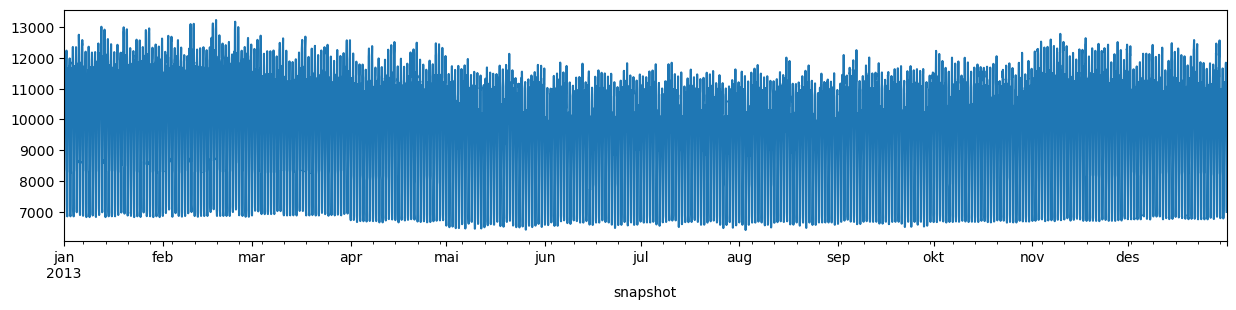

In [49]:
model.loads_t.p_set.sum(axis=1).plot(figsize=(15,3))  

Total annual system costs

In [50]:
model.objective/1e6 #million euroes per year

11211017.226777043

Transmission line expansion

In [51]:
model.lines.s_nom   #lines nominal capacities

Line
0      147.466806
1      147.466806
2      491.556019
3      491.556019
4      491.556019
         ...     
68      53.728216
69    1787.476433
70     491.556019
71     491.556019
72     147.466806
Name: s_nom, Length: 73, dtype: float64

In [52]:
model.lines.s_nom_opt #optimized transmission capacity expansion by x 

Line
0      824.966572
1      289.810171
2      956.915561
3      492.016551
4     1081.241015
         ...     
68     408.719500
69    1787.634541
70     773.222875
71    1779.111838
72     627.190560
Name: s_nom_opt, Length: 73, dtype: float64

Optimal generator/storage

In [53]:
model.generators.groupby ('carrier').p_nom_opt.sum() #GW

carrier
CCGT          5.242745e+03
OCGT          6.616041e+02
biomass       3.988719e+01
coal          6.000000e+02
geothermal    9.950000e+02
load          6.700000e+10
oil           8.227839e+02
onwind        1.300000e+03
ror           6.017862e+02
solar         3.000000e+03
Name: p_nom_opt, dtype: float64

In [54]:
model.storage_units.groupby ('carrier').p_nom_opt.sum() #MW

carrier
hydro    4340.625972
Name: p_nom_opt, dtype: float64

<AxesSubplot:xlabel='snapshot'>

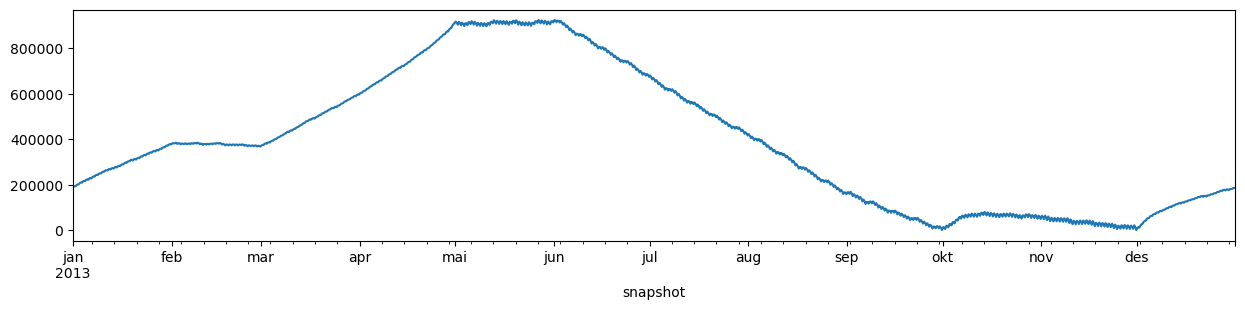

In [55]:
(model.storage_units_t.state_of_charge.filter(like='hydro',axis=1).sum(axis=1)).plot(figsize=(15,3))

In [56]:
#lost load
# Calculate lost load
lost_load = model.generators_t.p.loc[:, model.generators[model.generators.carrier == "load"].index]

# Total lost load over the entire period (in MWh)
total_lost_load = lost_load.sum().sum()

# Peak lost load (maximum lost load at any time snapshot)
peak_lost_load = lost_load.max().max()

# Print results
print(f"Total Lost Load: {total_lost_load:.2f} MWh")
print(f"Peak Lost Load: {peak_lost_load:.2f} MW")

Total Lost Load: 1400894277.28 MWh
Peak Lost Load: 268248.14 MW


In [57]:
# Group lost load by bus
lost_load_by_bus = lost_load.sum(axis=0).groupby(model.generators.loc[model.generators.carrier == "load", "bus"]).sum()

# Print top buses with the highest lost load
print("Top buses by lost load:")
print(lost_load_by_bus.sort_values(ascending=False).head(10))

Top buses by lost load:
bus
18    8.037961e+08
38    2.757654e+08
62    2.017742e+08
55    8.382032e+07
56    2.030495e+07
20    1.543319e+07
49    1.891014e+00
47    1.854326e+00
48    1.853506e+00
34    1.850832e+00
dtype: float64


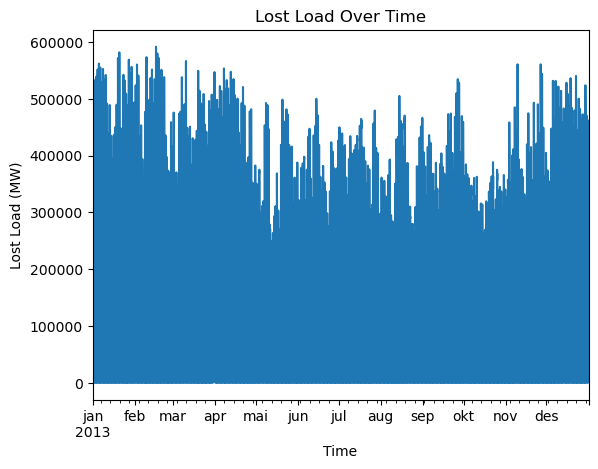

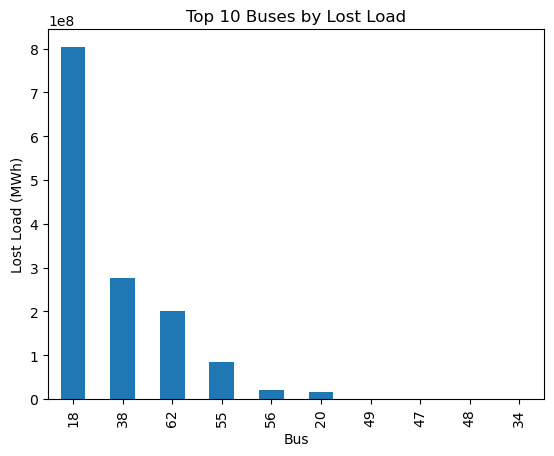

In [58]:
import matplotlib.pyplot as plt

#lost load over time
lost_load.sum(axis=1).plot(title="Lost Load Over Time", ylabel="Lost Load (MW)", xlabel="Time")
plt.show()

#lost lost per bus

lost_load_by_bus.sort_values(ascending=False).head(10).plot(kind="bar", title="Top 10 Buses by Lost Load", ylabel="Lost Load (MWh)", xlabel="Bus")
plt.show()

In [59]:
# #peak generation

# # Calculate total generation at each time step
# total_generation = model.generators_t.p.sum(axis=1)

# # Find the peak generation and its timestamp
# peak_generation = total_generation.model.max()
# peak_generation_time = total_generation.model.idxmax()

# # Print results
# print(f"Peak generation: {peak_generation:.2f} MW")
# print(f"Time of peak generation: {peak_generation_time}")


# # Plot total generation over time
# total_generation.model.plot(title="Total Generation Over Time", ylabel="Generation (MW)", xlabel="Time")


Peak demand: 13230.21 MW
Time of peak demand: 2013-02-17 17:00:00


<AxesSubplot:title={'center':'Total Demand Over Time'}, xlabel='Time', ylabel='Generation (MW)'>

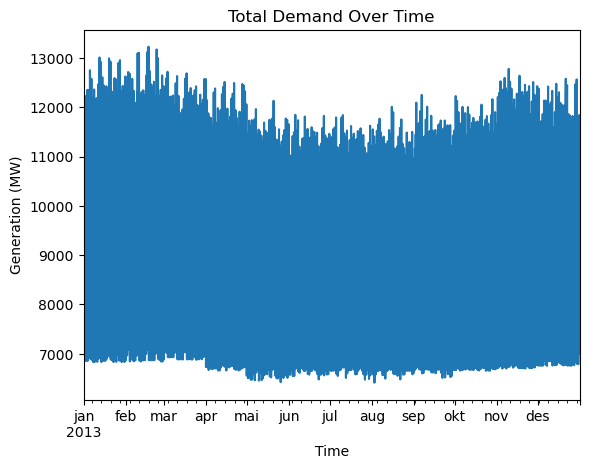

In [60]:
#peak demand
# Calculate total demand at each time step
total_demand = model.loads_t.p_set.sum(axis=1)

# Find the peak demand and its timestamp
peak_demand = total_demand.max()
peak_demand_time = total_demand.idxmax()

# Print results
print(f"Peak demand: {peak_demand:.2f} MW")
print(f"Time of peak demand: {peak_demand_time}")

# Plot total generation over time
total_demand.plot(title="Total Demand Over Time", ylabel="Generation (MW)", xlabel="Time")

Plotting networks with line loading

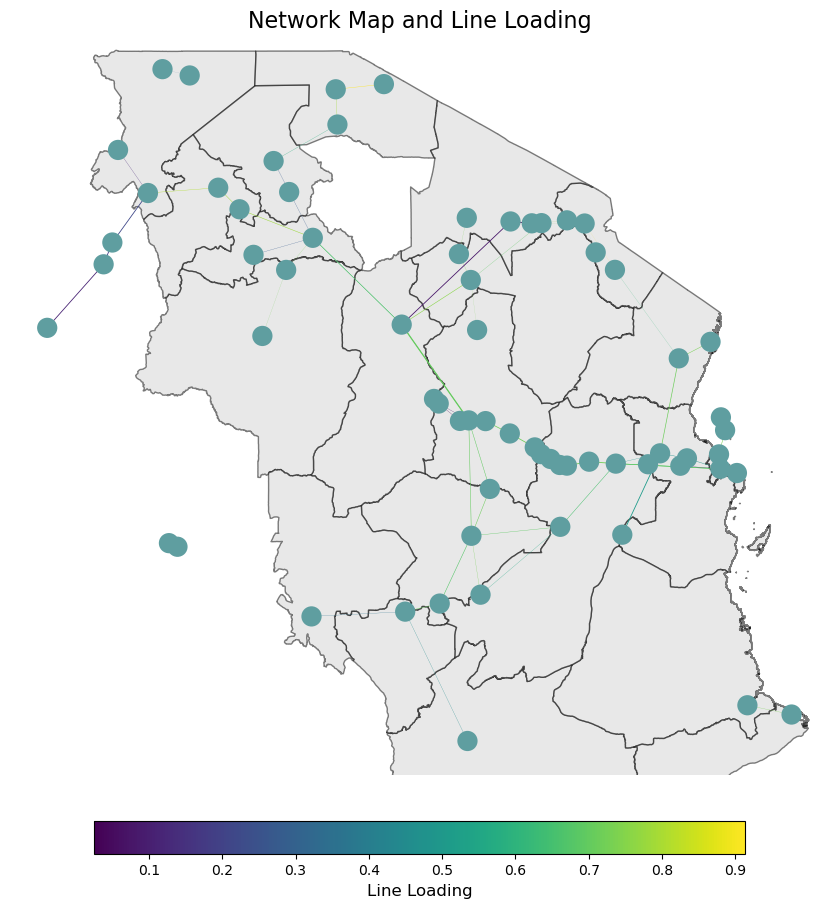

In [61]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

# Load GADM shapefile
gadm_path = "C:/Users/hie/pe_tan/pypsa-earth/resources/bus_regions/regions_onshore_elec_s_all.geojson"  # Replace with the actual path
gadm = gpd.read_file(gadm_path)

# Calculate line loading
loading = (
    (model.lines_t.p0.abs().mean().reindex(model.lines.index, fill_value=0) / 
    (model.lines.s_nom_opt * model.lines.s_max_pu).reindex(model.lines.index, fill_value=0))
    .fillna(0)
)



# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": ccrs.Mercator()})

# Plot the GADM shapefile
gadm.plot(ax=ax, edgecolor="black", facecolor="lightgray", alpha=0.5, transform=ccrs.PlateCarree())

# Plot the network
model.plot(
    ax=ax,
    branch_components=["Line"],  # Plot only lines
    line_widths=model.lines.s_nom_opt / 3e3,  # Scale line widths
    line_colors=loading,  # Color lines by loading
    color_geomap=False,  # Do not recolor the background
)

# Customize the plot
ax.set_title("Network Map and Line Loading", fontsize=16)
ax.axis("off")  # Turn off axis

# Add a colorbar for line loading
sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=loading.min(), vmax=loading.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation="horizontal", pad=0.05, shrink=0.7)
cbar.set_label("Line Loading", fontsize=12)

# Show the plot
plt.show()

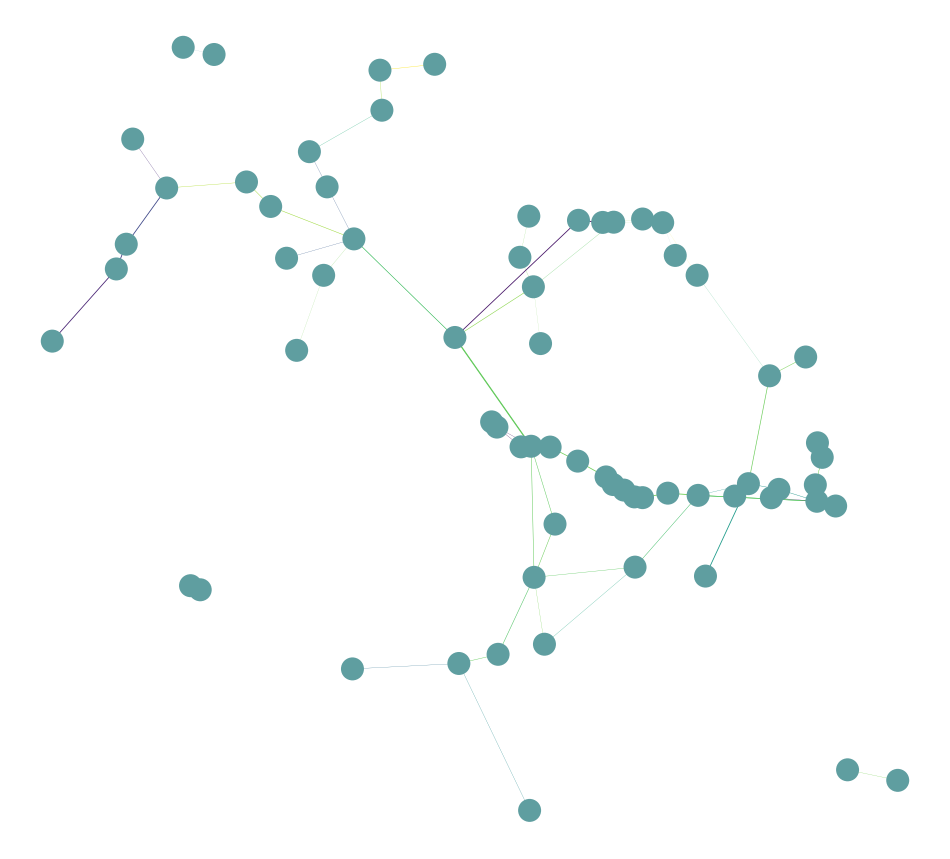

In [62]:



loading = (
    (model.lines_t.p0.abs().mean().reindex(model.lines.index, fill_value=0) / 
    (model.lines.s_nom_opt * model.lines.s_max_pu).reindex(model.lines.index, fill_value=0))
    .fillna(0)
)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": ccrs.Mercator()})

model.plot(
    ax=ax,
    branch_components=["Line"],  # Plot only lines
    line_widths=model.lines.s_nom_opt / 3e3,  # Scale line widths
    line_colors=loading,  # Color lines by loading
    color_geomap=False
    )

plt.show()

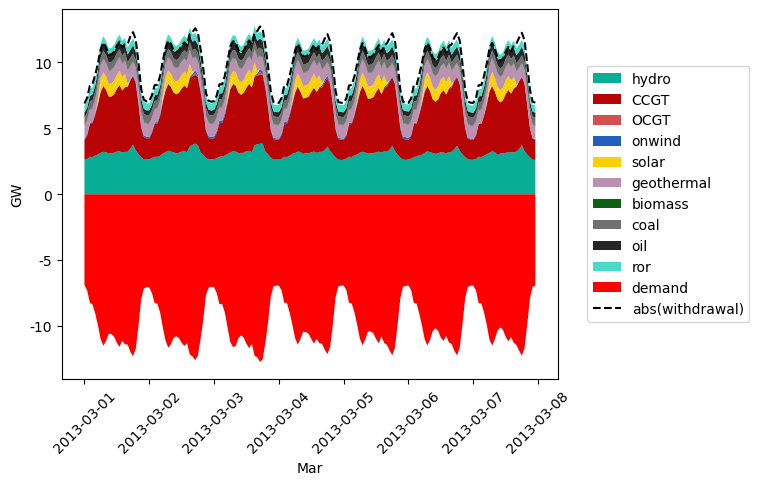

In [63]:
#dispatch optimized sustem
# 
first_date = "2013-03-01"
second_date = "2013-03-07"
CCGT = model.generators_t.p.loc[first_date:second_date].T.groupby(model.generators.carrier).sum().loc["CCGT"]
OCGT = model.generators_t.p.loc[first_date:second_date].T.groupby(model.generators.carrier).sum().loc["OCGT"]
Onwind = model.generators_t.p.loc[first_date:second_date].T.groupby(model.generators.carrier).sum().loc["onwind"]
solar = model.generators_t.p.loc[first_date:second_date].T.groupby(model.generators.carrier).sum().loc["solar"]
geothermal= model.generators_t.p.loc[first_date:second_date].T.groupby(model.generators.carrier).sum().loc["geothermal"]
biomass = model.generators_t.p.loc[first_date:second_date].T.groupby(model.generators.carrier).sum().loc["biomass"]
coal = model.generators_t.p.loc[first_date:second_date].T.groupby(model.generators.carrier).sum().loc["coal"]
oil = model.generators_t.p.loc[first_date:second_date].T.groupby(model.generators.carrier).sum().loc["oil"]
ror= model.generators_t.p.loc[first_date:second_date].T.groupby(model.generators.carrier).sum().loc["ror"]


hydro = model.storage_units_t.p.loc[first_date:second_date].T.groupby(model.storage_units.carrier).sum().loc["hydro"]

demand = model.loads_t.p_set.loc[first_date:second_date].sum(axis=1)*-1

# names for labels
demand.name = "demand"

fig, ax=plt.subplots()
 
plt.stackplot(
    CCGT.index,
    supply:=(hydro.where(hydro > 0, 0), CCGT, OCGT, Onwind,  solar, solar, geothermal, biomass, coal, oil, ror), 
    labels=[key.name for key in supply],
    colors=[model.carriers.color.get(source.name, default="gray") for source in supply], 
    zorder = 99
)
plt.stackplot(
    CCGT.index,
    withdrawal:=(demand, hydro.where(hydro < 0, 0)),
    labels=[source.name for source in withdrawal],
    colors=[model.carriers.color.get(key.name, default="red") for key in withdrawal], 
    zorder = 1
)
plt.plot(sum(withdrawal).abs(), color = "black", label="abs(withdrawal)", linestyle="dashed", zorder=100)


plt.xticks(rotation = 45)
plt.yticks()
scale_y = 1e3
ticks_y = ticker.FuncFormatter(lambda x, pos: "{0:g}".format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
#myFmt = mdates.DateFormatter("%d")
#ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel("GW")
ax.set_xlabel("Mar")

handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # remove duplicates

plt.legend(unique_labels.values(), unique_labels.keys(), loc="center right", bbox_to_anchor=(1.4, 0.5))
plt.show()
#fig.savefig("path")

c:\Users\hie\AppData\Local\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".



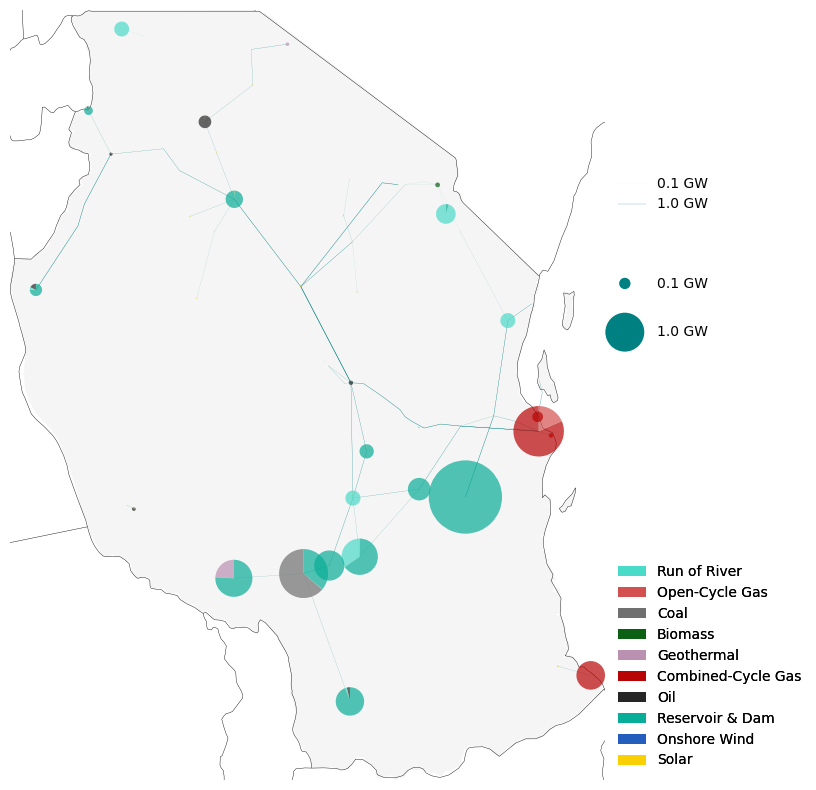

In [64]:
# CURRENT SYSTEM##
# # Filter carriers to include only those present in the model
present_carriers = set(model.generators.carrier.unique()).union(model.storage_units.carrier.unique())
filtered_carriers = model.carriers[model.carriers.index.isin(present_carriers)]

# Scale settings
bus_scale = 6e3 
line_scale = 6e3

# Legend settings
bus_sizes = [100, 1000]  # in MW
line_sizes = [100, 1000]  # in MW

#model.carriers.drop("load", inplace=True)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": ccrs.EqualEarth(model.buses.x.mean())})
gen = model.generators[model.generators.carrier != "load"].groupby(["bus", "carrier"]).p_nom.sum()
sto = model.storage_units.groupby(["bus", "carrier"]).p_nom.sum()
buses = pd.concat([gen, sto])

with plt.rc_context({"patch.linewidth": 0.}):
    model.plot(
        bus_sizes=buses / bus_scale,
        bus_alpha=0.7,
        line_widths=model.lines.s_nom_opt / line_scale,
        link_widths=model.links.p_nom_opt / line_scale,
        line_colors="teal",
        ax=ax,
        margin=0.2,
        color_geomap=None,
    )
regions_onshore.plot(
    ax=ax,
    facecolor="whitesmoke",
    edgecolor="white",
    aspect="equal",
    transform=ccrs.PlateCarree(),
    linewidth=0,
)
ax.set_extent(regions_onshore.total_bounds[[0, 2, 1, 3]])
legend_kwargs = {"loc": "upper left", "frameon": False}
legend_circles_dict = {"bbox_to_anchor": (1, 0.67), "labelspacing": 2.5, **legend_kwargs}

# Add legend circles with custom colors using patch_kw
add_legend_circles(
    ax,
    [s / bus_scale for s in bus_sizes],
    [f"{s / 1000} GW" for s in bus_sizes],
    legend_kw=legend_circles_dict,
    patch_kw={"facecolor": "teal", "edgecolor": "white"}  # Custom colors
)

add_legend_lines(
    ax,
    [s / line_scale for s in line_sizes],
    [f"{s / 1000} GW" for s in line_sizes],
    legend_kw={"bbox_to_anchor": (1, 0.8), **legend_kwargs},
    #patch_kw={"facecolor": "teal"},  # Custom colors
)
add_legend_patches(
    ax,
    filtered_carriers.color,
    filtered_carriers.nice_name,
    legend_kw={"bbox_to_anchor": (1, 0), **legend_kwargs, "loc":"lower left"},
)
fig.tight_layout()

c:\Users\hie\AppData\Local\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".



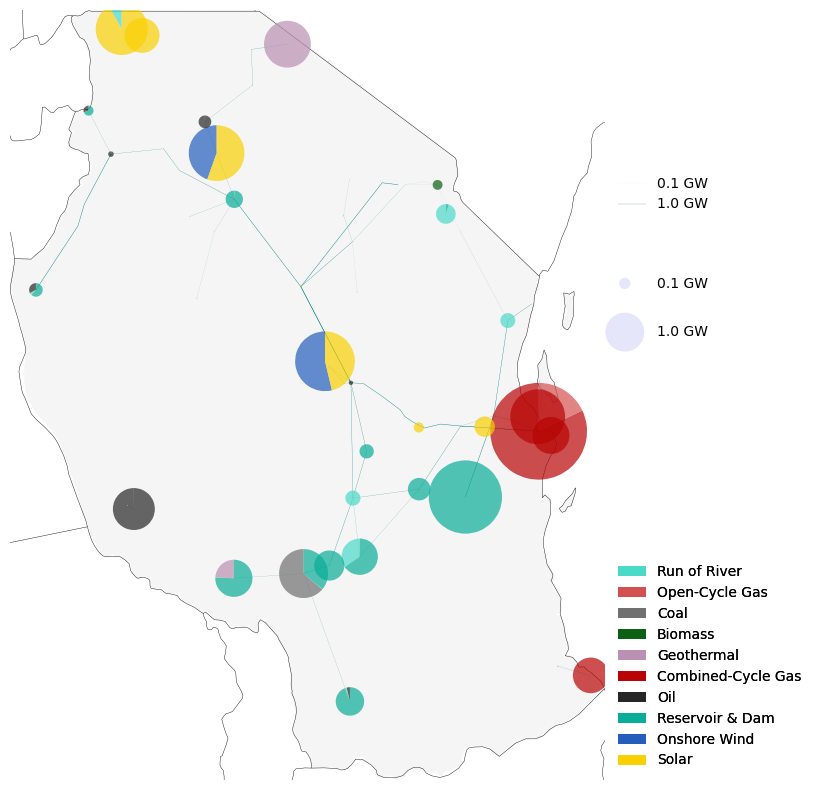

In [65]:
##FUTURE OPTIMIZED SYSTEM###

# Filter carriers to include only those present in the model
present_carriers = set(model.generators.carrier.unique()).union(model.storage_units.carrier.unique())
filtered_carriers = model.carriers[model.carriers.index.isin(present_carriers)]

# Plot the network
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": ccrs.EqualEarth(model.buses.x.mean())})
gen = model.generators[model.generators.carrier != "load"].groupby(["bus", "carrier"]).p_nom_opt.sum()
sto = model.storage_units.groupby(["bus", "carrier"]).p_nom_opt.sum()
buses = pd.concat([gen, sto])

with plt.rc_context({"patch.linewidth": 0.}):
    model.plot(
        bus_sizes=buses / bus_scale,
        bus_alpha=0.7,
        line_widths=model.lines.s_nom_opt / line_scale,
        link_widths=model.links.p_nom_opt / line_scale,
        line_colors="teal",
        ax=ax,
        margin=0.2,
        color_geomap=None,
    )
regions_onshore.plot(
    ax=ax,
    facecolor="whitesmoke",
    edgecolor="white",
    aspect="equal",
    transform=ccrs.PlateCarree(),
    linewidth=0,
)
ax.set_extent(regions_onshore.total_bounds[[0, 2, 1, 3]])
legend_kwargs = {"loc": "upper left", "frameon": False}
legend_circles_dict = {"bbox_to_anchor": (1, 0.67), "labelspacing": 2.5, **legend_kwargs}

# Add legend circles
add_legend_circles(
    ax,
    [s / bus_scale for s in bus_sizes],
    [f"{s / 1000} GW" for s in bus_sizes],
    legend_kw=legend_circles_dict,
    patch_kw={"facecolor": "lavender", "edgecolor": "white"}     
)

# Add legend lines
add_legend_lines(
    ax,
    [s / line_scale for s in line_sizes],
    [f"{s / 1000} GW" for s in line_sizes],
    legend_kw={"bbox_to_anchor": (1, 0.8), **legend_kwargs},
)

# Add legend patches for filtered carriers
add_legend_patches(
    ax,
    filtered_carriers.color,
    filtered_carriers.nice_name,
    legend_kw={"bbox_to_anchor": (1, 0), **legend_kwargs, "loc": "lower left"},
)

fig.tight_layout()

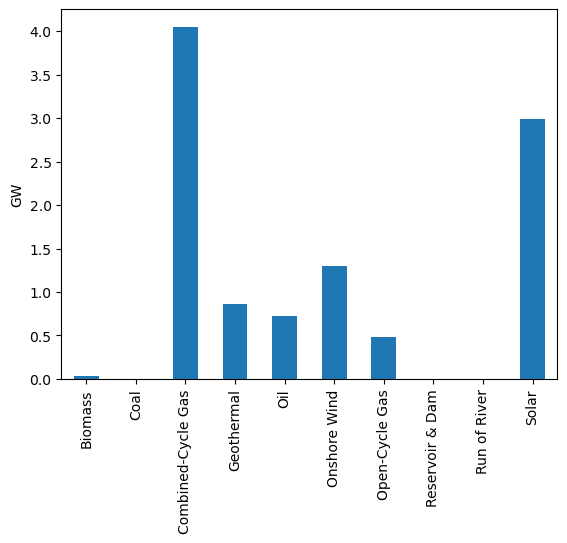

In [68]:
# Calculate optimal and installed capacities for generators
optimal_capacity_generators = model.statistics.optimal_capacity(comps=["Generator"]).droplevel(0).div(1e3)
installed_capacity_generators = model.statistics.installed_capacity(comps=["Generator"]).droplevel(0).div(1e3)

# Calculate optimal and installed capacities for storage units
optimal_capacity_storage = model.statistics.optimal_capacity(comps=["StorageUnit"]).droplevel(0).div(1e3)
installed_capacity_storage = model.statistics.installed_capacity(comps=["StorageUnit"]).droplevel(0).div(1e3)

# Combine generator and storage capacities
optimal_capacity = pd.concat([optimal_capacity_generators, optimal_capacity_storage]).groupby(level=0).sum()
installed_capacity = pd.concat([installed_capacity_generators, installed_capacity_storage]).groupby(level=0).sum()

# Calculate capacity expansion
generation_capacity_expansion = optimal_capacity - installed_capacity
generation_capacity_expansion.drop(["load"], inplace=True, errors="ignore")  # Drop "load" if it exists

# Plot the capacity expansion
generation_capacity_expansion.plot.bar(title="")
plt.ylabel("GW")
plt.xlabel("")
plt.show()

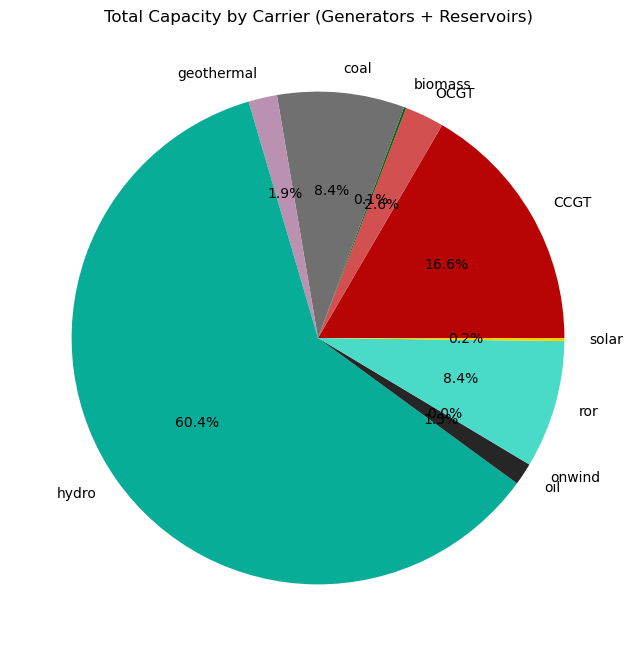

In [ ]:
# Combine generator and reservoir capacities
generator_capacity_by_carrier = (
    model.generators[model.generators.carrier != "load"]
    .groupby(["carrier"])
    .p_nom.sum()
)

reservoir_capacity_by_carrier = (
    model.storage_units[model.storage_units.carrier != "load"]
    .groupby(["carrier"])
    .p_nom.sum()
)

# Combine both capacities into a single DataFrame
total_capacity_by_carrier = (
    pd.concat([generator_capacity_by_carrier, reservoir_capacity_by_carrier])
    .groupby(level=0)
    .sum()
)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    total_capacity_by_carrier,
    labels=total_capacity_by_carrier.index,
    autopct='%1.1f%%',
    colors=model.carriers[
        model.carriers.index.isin(total_capacity_by_carrier.index)
    ].color.reindex(total_capacity_by_carrier.index)
)
plt.title("Total Capacity by Carrier (Generators + Reservoirs)")
plt.show()

In [ ]:
#transmission line lopf

